In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
from sklearn.datasets import load_wine

In [4]:
data = load_wine(as_frame=True)
df = data.frame

In [72]:
df.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0,0


In [15]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [80]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [73]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

In [76]:
feat = df.columns
print("No. of Samples: ", len(df))
print("No of Features: ", len(df.columns) - 1)
print("The Features are: ", feat[:-1])

No. of Samples:  178
No of Features:  13
The Features are:  Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')


In [48]:
X = df.drop(columns='target')
y = df['target']

In [49]:
Xtr, xt, Ytr, yt = train_test_split(X, y, test_size=0.3, random_state=42)

(array([[124.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [124.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [124.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [124.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [123.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [124.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [124.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [124.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [124.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [124.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [124.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [124.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   2.,  20.,  31.,  27.,  13.,  12.,   7.,   8.,   4.]]),
 array([1.300000e-01, 1.548170e+02, 3.095040e+02, 4.641910e+02,
        6.188780e+02, 7.

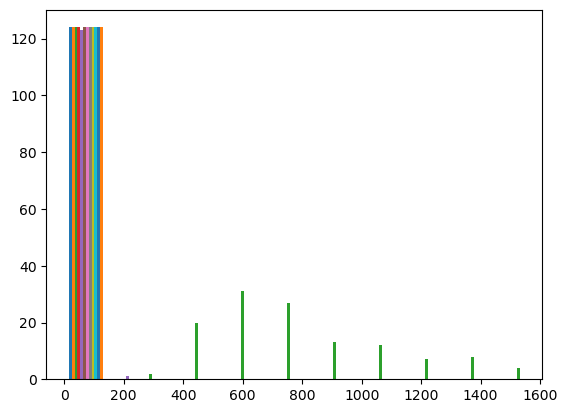

In [50]:
plt.hist(Xtr)

(array([[54.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [54.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [54.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [54.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [54.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [54.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [54.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [54.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [54.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [54.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [54.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [54.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  2., 12., 12.,  9.,  3.,  7.,  7.,  0.,  2.]]),
 array([1.700000e-01, 1.681530e+02, 3.361360e+02, 5.041190e+02,
        6.721020e+02, 8.400850e+02, 1.008068e+03, 1.176051e+03,
        1.344034e+03, 1.512017e+03, 1.680000e+03]),
 <a list of 13 BarContainer objects>)

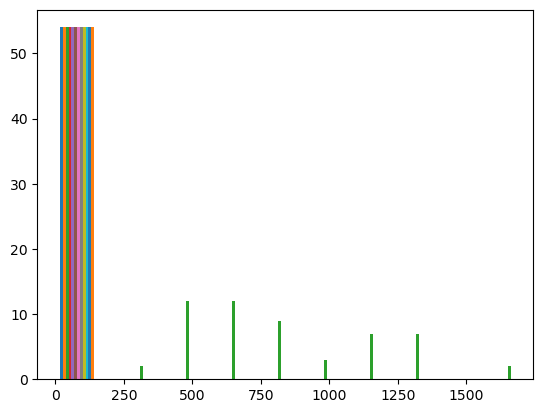

In [51]:
plt.hist(xt)

In [52]:
scaler = StandardScaler()
Xtr = scaler.fit_transform(Xtr)
xt = scaler.fit(xt)

In [53]:
Xtr

array([[ 0.62844732,  1.08120605, -0.65212742, ..., -0.64137827,
        -1.07090115, -0.51821917],
       [-0.54088231, -0.61299439, -1.42753372, ...,  0.34652993,
         1.33076844, -0.21506322],
       [-0.75565714, -1.28703113, -1.53830605, ...,  0.43243499,
        -0.39843366,  0.04196031],
       ...,
       [ 1.69038953, -0.48547393,  0.04943066, ...,  1.03377042,
         0.54851034,  2.66821356],
       [-0.32610748, -0.79516648, -0.39365865, ...,  0.00290969,
        -0.74152932, -0.79830892],
       [-0.74372521,  0.04282513,  0.34482354, ..., -0.6843308 ,
         1.07001574, -0.98613381]])

(array([[ 0.,  1.,  8., 31., 30., 26., 23.,  5.,  0.,  0.],
        [ 0.,  0.,  0., 38., 43., 17., 16.,  7.,  3.,  0.],
        [ 1.,  1.,  8., 14., 52., 27., 16.,  3.,  2.,  0.],
        [ 0.,  3.,  6., 22., 35., 40., 12.,  3.,  3.,  0.],
        [ 0.,  0.,  1., 39., 35., 28., 13.,  5.,  1.,  2.],
        [ 0.,  0.,  6., 35., 24., 32., 22.,  4.,  1.,  0.],
        [ 0.,  0., 10., 30., 23., 35., 24.,  1.,  1.,  0.],
        [ 0.,  0.,  6., 32., 33., 26., 16., 11.,  0.,  0.],
        [ 0.,  0.,  6., 24., 46., 31.,  9.,  6.,  1.,  1.],
        [ 0.,  0.,  2., 38., 35., 25., 13.,  9.,  2.,  0.],
        [ 0.,  0., 13., 24., 28., 38., 15.,  5.,  0.,  1.],
        [ 0.,  0., 13., 25., 17., 43., 24.,  2.,  0.,  0.],
        [ 0.,  0.,  2., 39., 39., 17., 15., 10.,  2.,  0.]]),
 array([-3.7168285 , -2.94579993, -2.17477136, -1.40374279, -0.63271422,
         0.13831435,  0.90934293,  1.6803715 ,  2.45140007,  3.22242864,
         3.99345721]),
 <a list of 13 BarContainer objects>)

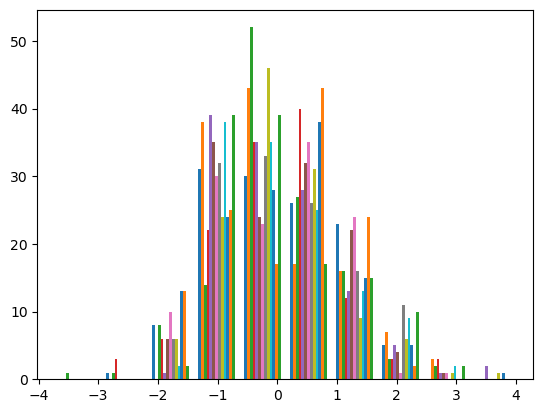

In [54]:
plt.hist(Xtr)

TypeError: object of type 'StandardScaler' has no len()

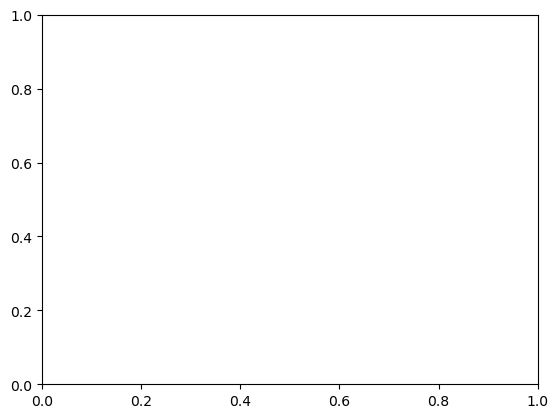

In [55]:
plt.hist(xt)

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
model = DecisionTreeClassifier()

In [58]:
mt = model.fit(Xtr, Ytr)

In [78]:
mt.classes_

array([0, 1, 2])

In [59]:
ypred = mt.predict(xt)

TypeError: float() argument must be a string or a real number, not 'StandardScaler'

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
print("Accuracy Score is ", accuracy_score(yt, ypred))
print("Precision Score is ", precision_score(yt, ypred))
print("Recall Score is ", recall_score(yt, ypred))
print("F1 Score is ", f1_score(yt, ypred))

In [60]:
arr = ["Hello", "Anshul", "World", "Bye"]

In [62]:
arr = np.array(arr)

In [63]:
arr

array(['Hello', 'Anshul', 'World', 'Bye'], dtype='<U6')

In [ ]:
def find(strr, vow):
    for

In [69]:
def coun(strr):
    maxx = 0
    vow = np.array(['a', 'e', 'i', 'o', 'u'])
    for i in range(0, len(strr)):
        if vow.find(strr[i]):
            maxx += 1
    return maxx

In [70]:
countt = []
for j in range(0, len(arr)):
    c = coun(arr[j])
    countt.append(c)
    
ma = 0
ind = 0
for k in range(0, len(countt)):
    if ma < countt[k]:
        ma = countt
        ind = i

AttributeError: 'numpy.ndarray' object has no attribute 'find'